# Name : Suyash Pratap Singh


# Reg ID : GO_STP_6412

# TASKS:-
Build a spam filter using Python and the multinomial Naive Bayes algorithm.

Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Dataset Understanding

In [4]:
df.ndim

2

In [5]:
df.shape

(5572, 2)

In [6]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
df.dtypes

Category    object
Message     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


### Handing Missing Values

**Checking for missing values**

In [10]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.isnull().any()

Category    False
Message     False
dtype: bool

**Visualization of missing values**

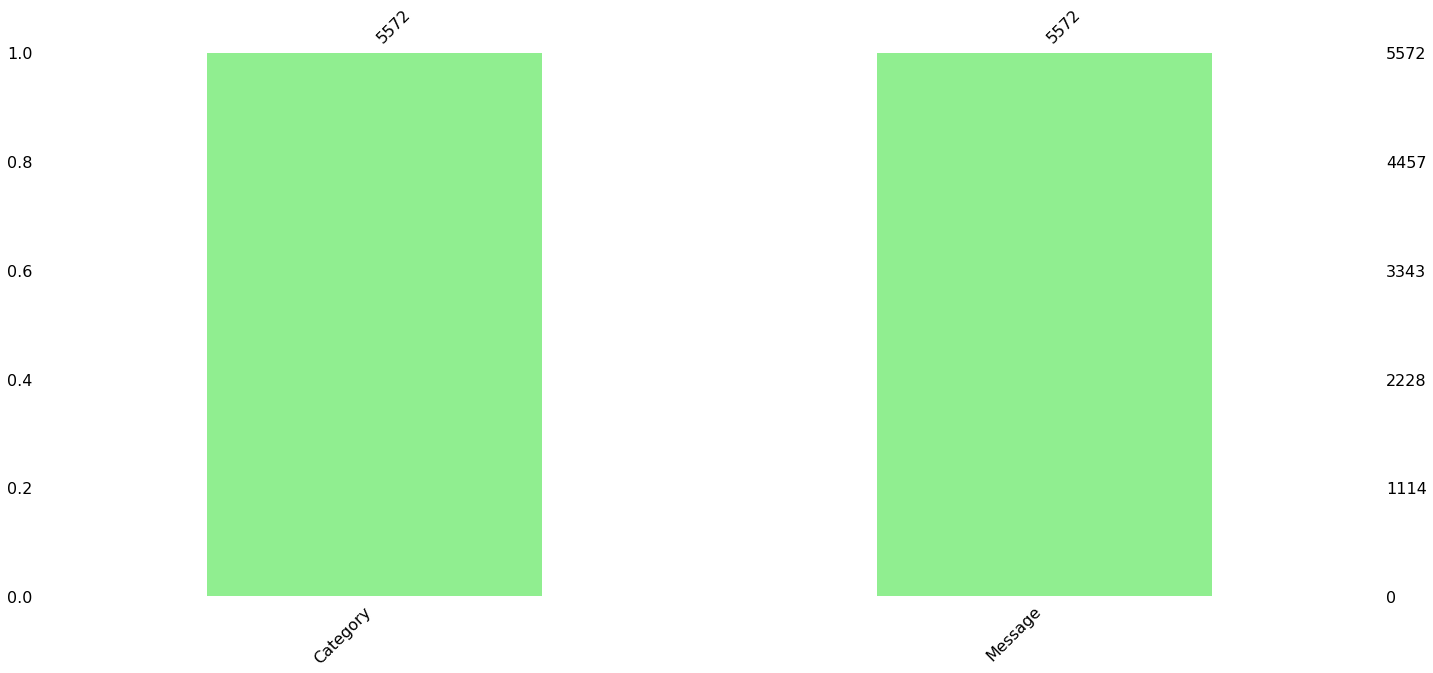

In [14]:
msno.bar(df,color='lightgreen')
plt.show()

### Data Visualization

In [15]:
df['Message_Length'] = df['Message'].apply(len)

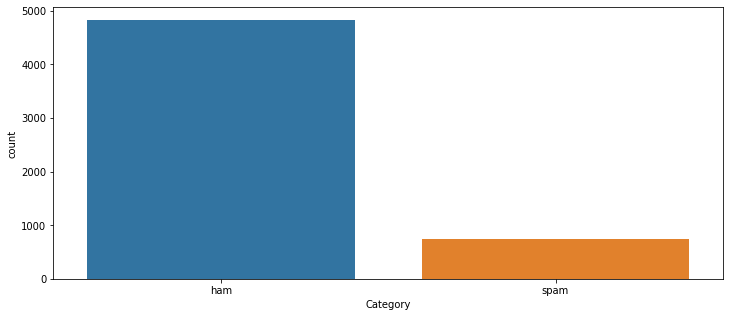

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(df.Category)
plt.show()

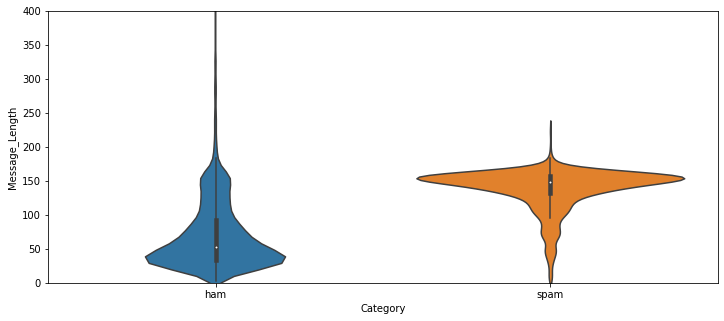

In [18]:
plt.figure(figsize=(12,5))
sns.violinplot(y='Message_Length', x='Category',data=df)
plt.ylim((0,400))
plt.show()

<Figure size 864x360 with 0 Axes>

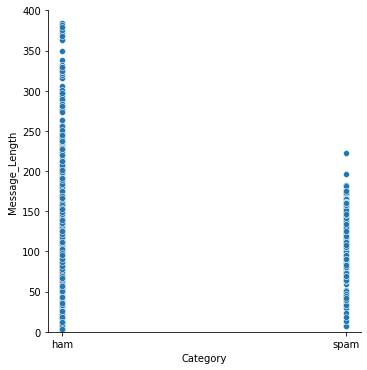

In [21]:
plt.figure(figsize=(12,5))
sns.relplot(y='Message_Length', x='Category',data=df)
plt.ylim((0,400))
plt.show()

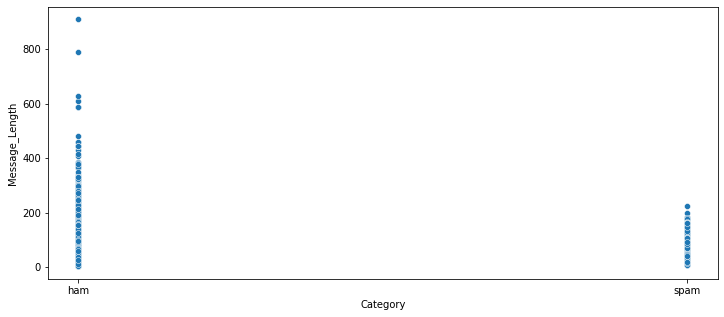

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(y='Message_Length', x='Category',data=df)
plt.show()

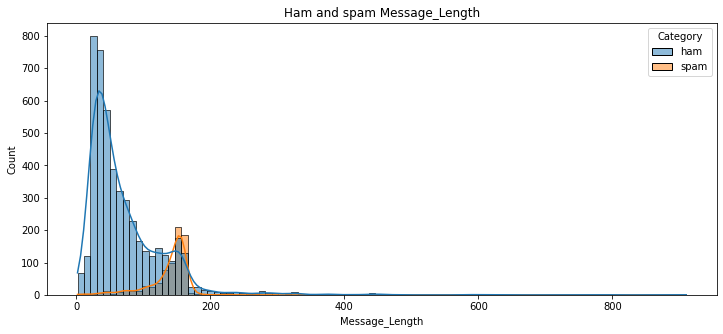

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(x= df['Message_Length'],hue=df['Category'],kde=True)
plt.title('Ham and spam Message_Length')
plt.show()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer =CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
text = df['Message'].copy()
vectorizer =TfidfVectorizer("english")
x= vectorizer.fit_transform(text)
y=df['Category']

In [33]:
x[:5]

<5x8709 sparse matrix of type '<class 'numpy.float64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [34]:
y[:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Category, dtype: object

In [35]:
# Splitting train and test data:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, stratify=y,random_state=100)

# Models:-


#  Multinomial Naïve Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
multinomialnb = MultinomialNB()
multinomialnb.fit(x_train,y_train)

MultinomialNB()

In [45]:
# Predicting on test data:

y_pred = multinomialnb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

0.9635167464114832


# SVM

In [46]:
from sklearn.svm import LinearSVC
linearsvc = LinearSVC()
linearsvc.fit(x_train,y_train)

LinearSVC()

In [47]:
# Predicting on test data:

y_pred = linearsvc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.97      0.88      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672

0.9796650717703349


# Results of our Models

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.97      0.88      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



0.9796650717703349

# Confusion Matrix

In [50]:
confusion_matrix(y_test,y_pred)

array([[1442,    6],
       [  28,  196]], dtype=int64)

# Conclusion:-
By seeing the above results, we can say that the Naïve Bayes model and SVM are performing well on classifying spam messages with 96% and 97% accuracy but comparing the two models, SVM is performing better. These models can efficiently predict if the message is spam or not.

# Thank you